In [4]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d


In [5]:
df_train = pd.read_csv("./../DATASET/agnews/train.csv")

In [6]:
embedder = SentenceTransformer('all-mpnet-base-v2')

In [7]:
corpus_embeddings = embedder.encode(df_train['Description'][:4000])

In [8]:
#Redução de atributos com TSNE de 768 -> 2
tsne = TSNE(random_state = 0, n_components=2, n_iter = 1000, perplexity=4, metric = 'euclidean')
embeddings2d = tsne.fit_transform(corpus_embeddings)

In [9]:
color = {1:'.b',2:'.r',3:'.c',4:'.y'}
colors=[ color[x] for x in df_train['Class Index'][:1000]]
# color[df_train['Class Index'][:0]]

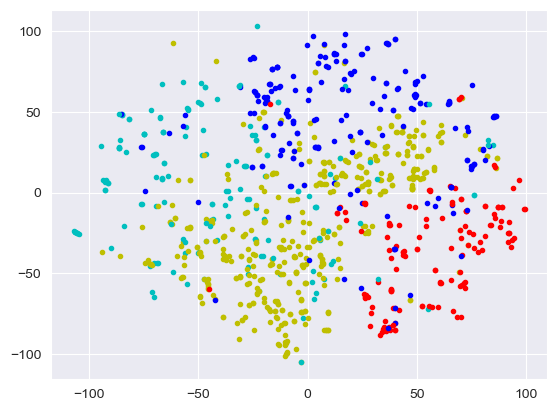

In [10]:
plt.plot(projection='3d')
for cl, xy in zip(colors,embeddings2d):
    plt.plot(xy[0],xy[1],cl)

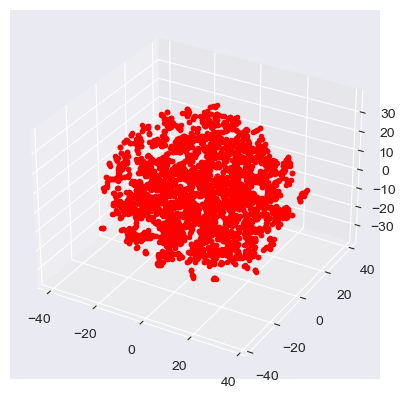

In [12]:
#Redução de atributos com TSNE de 768 -> 2
tsne = TSNE(random_state = 0, n_components=3, n_iter = 1000, perplexity=4, metric = 'euclidean')
embeddings2d = tsne.fit_transform(corpus_embeddings)
ax = plt.axes(projection='3d')
ax.plot(embeddings2d[:,0],embeddings2d[:,1],embeddings2d[:,2],'.r')


Resumo da Matriz:
 [[1.93000000e+02 7.86000000e+02 0.00000000e+00 2.00000000e+00]
 [8.20000000e+02 8.28000000e+02 0.00000000e+00 2.00000000e+00]
 [8.53000000e+02 8.84000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [6.76000000e+02 1.99500000e+03 1.24380873e+00 9.97000000e+02]
 [1.96300000e+03 1.99600000e+03 1.24491177e+00 9.99000000e+02]
 [9.26000000e+02 1.99700000e+03 1.25424568e+00 1.00000000e+03]]


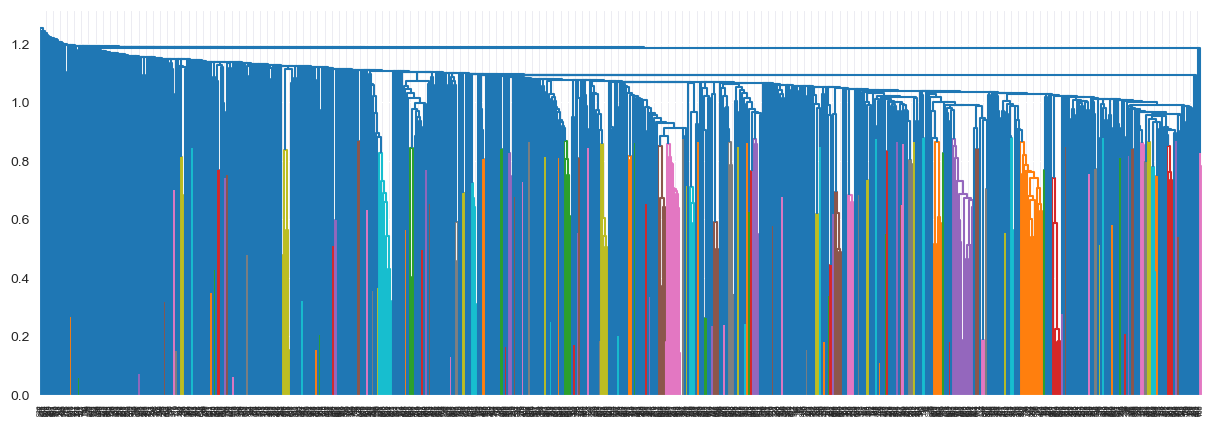

In [14]:
from scipy.spatial.distance import pdist, squareform #biblioteca para calcular as distâncias pareadas (entre todos os pares de objetos)
distances = pdist(corpus_embeddings) #função para calcular as distâncias pareadas.
dist_matrix = squareform(distances) #Mostrando as distâncias no forma de matriz quadrada.

from scipy.cluster.hierarchy import linkage, single, complete, average, ward, dendrogram, to_tree
linkage_matrix = single(distances) # E se fosse o complete? Ward? .... (teste)

print('Resumo da Matriz:\n',linkage_matrix) #Sabendo que há grupos de 0...6, quando uma união é realizada (Grupos 4. 5.) é criado um novo grupo com indice 7 (ultimo 6 +1) e assim por diante.

fig = plt.figure(figsize=(15, 5))
dn = dendrogram(linkage_matrix) #Visualizando o dendograma das unioes